LendingClub is a US peer-to-peer lending company. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market.
Our goal is to see, given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or not a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_info = pd.read_csv('lending_club_info.csv', index_col='LoanStatNew')

In [3]:
data_info 

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
df = pd.read_csv('lending_club_loan_two.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


# EDA

<AxesSubplot:xlabel='loan_status', ylabel='count'>

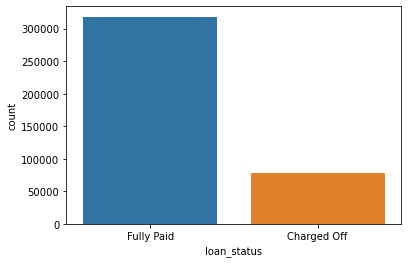

In [8]:
sns.countplot(x='loan_status', data = df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

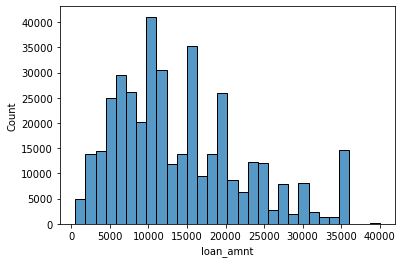

In [9]:
sns.histplot(x='loan_amnt', data = df, bins = 30)

<AxesSubplot:>

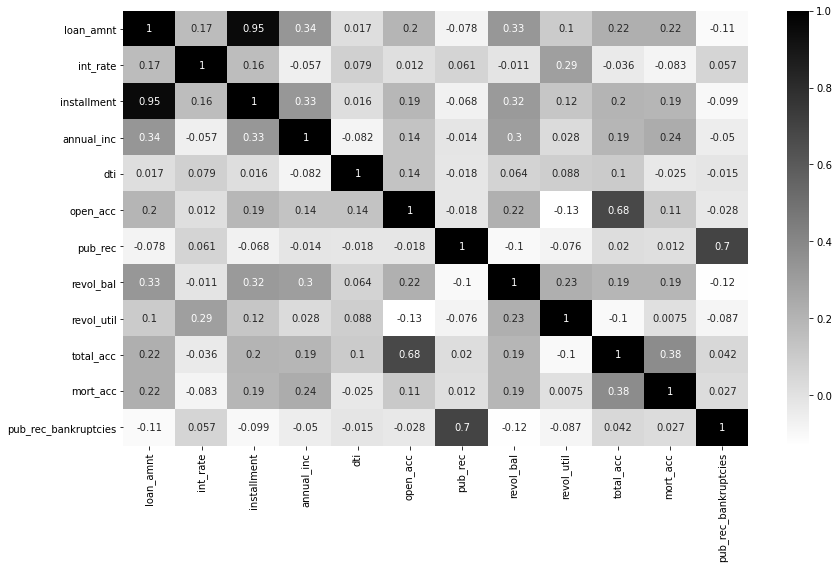

In [10]:
# We see a 0.95 corr between loan_amnt and installment, multicolinearity case.
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='gist_yarg')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

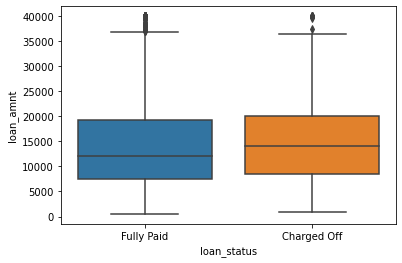

In [11]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [12]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [13]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [14]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

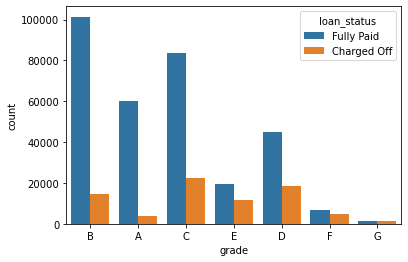

In [15]:
sns.countplot(x='grade', data=df, hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

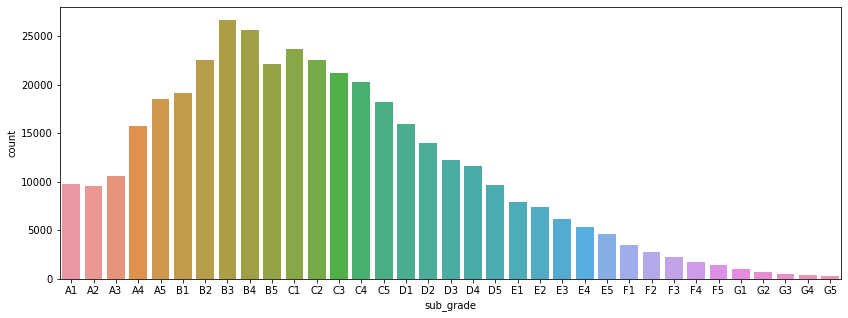

In [16]:
plt.figure(figsize=(14,5))
sns.countplot(x='sub_grade', data = df, order = sorted(df['sub_grade'].unique()))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

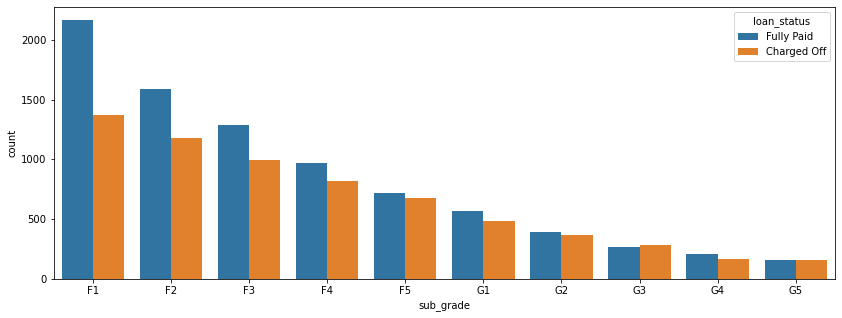

In [17]:
# Seems like F and G subgrades don't get paid back that often
plt.figure(figsize=(14,5))
sns.countplot(x='sub_grade', data = df[(df['grade'] == 'F') |  (df['grade'] == 'G')],
              order = sorted(df[(df['grade']=='F') | (df['grade']=='G')]['sub_grade'].unique()), hue='loan_status')

In [18]:
df['Fully_Paid'] = pd.get_dummies(df['loan_status'], drop_first=True)

In [19]:
df= df.drop('loan_status', axis=1)

<AxesSubplot:>

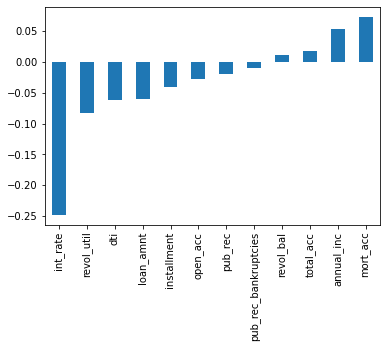

In [20]:
# Let's see a correlation between Fully_Paid and other numerical columns
df.drop('Fully_Paid', axis=1).corrwith(df['Fully_Paid']).sort_values().plot.bar()

# Data Preprocessing

In [21]:
len(df)

396030

In [22]:
# missing data
df.isnull().sum().sort_values(ascending = False).head(7) 

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
earliest_cr_line            0
dtype: int64

In [23]:
# percentage of missing data
(df.isnull().sum() / df.isnull().count()).sort_values(ascending = False).head(7)

mort_acc                0.095435
emp_title               0.057892
emp_length              0.046211
title                   0.004431
pub_rec_bankruptcies    0.001351
revol_util              0.000697
earliest_cr_line        0.000000
dtype: float64

In [24]:
print(data_info.loc['emp_title']['Description'])
print('\n')
print(data_info.loc['emp_length']['Description'])

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [25]:
# There is too much unique job titles to make them dummy variables. We should delete emp_title column.
df['emp_title'].value_counts()

Teacher                                   4389
Manager                                   4250
Registered Nurse                          1856
RN                                        1846
Supervisor                                1830
                                          ... 
Vitas Healthcare                             1
youth director                               1
OB/GYN Associates of the Southern Tier       1
Clinical Operations General Manager          1
sr graphic designer                          1
Name: emp_title, Length: 173105, dtype: int64

In [26]:
df = df.drop('emp_title', axis = 1)

In [27]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [28]:
order = df['emp_length'].value_counts().index

In [29]:
order = ['< 1 year', '1 year','2 years', '3 years','4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years','10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

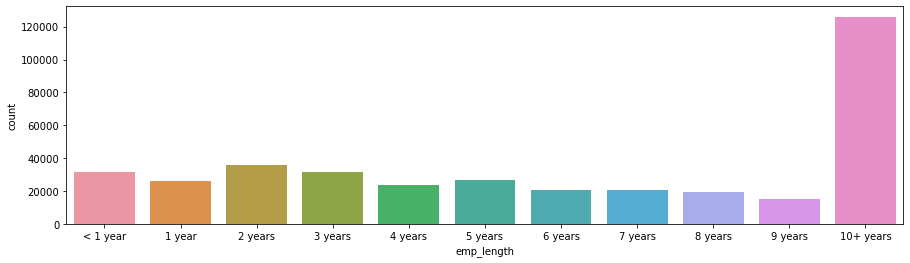

In [30]:
plt.figure(figsize=(15,4))
sns.countplot(x=df['emp_length'], order = order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

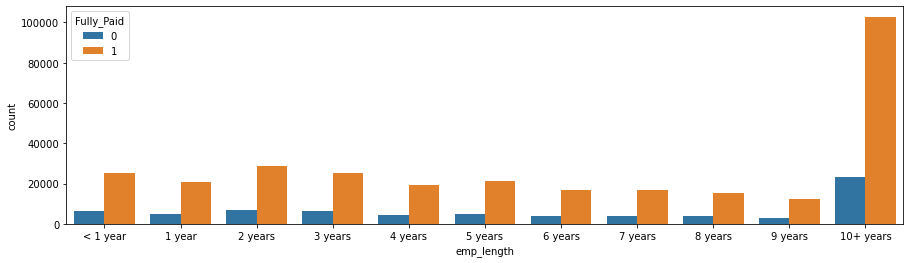

In [31]:
plt.figure(figsize=(15,4))
sns.countplot(x='emp_length', data=df, order = order, hue='Fully_Paid')

In [32]:
df.groupby(by='Fully_Paid')['emp_length'].describe()

,count,unique,top,freq
Fully_Paid,,,,
0,72635,11,10+ years,23215
1,305094,11,10+ years,102826


In [33]:
# Percentage of fully paid per emp_length
df.groupby(by='emp_length')['Fully_Paid'].mean()

emp_length
1 year       0.800865
10+ years    0.815814
2 years      0.806738
3 years      0.804769
4 years      0.807615
5 years      0.807813
6 years      0.810806
7 years      0.805226
8 years      0.800240
9 years      0.799530
< 1 year     0.793128
Name: Fully_Paid, dtype: float64

<AxesSubplot:xlabel='emp_length'>

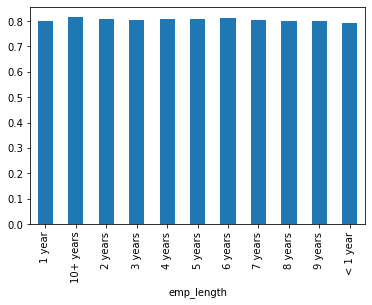

In [34]:
df.groupby(by='emp_length')['Fully_Paid'].mean().plot.bar()

In [35]:
# Fully paid rates are extremely similar so we will drop the emp_length column
df = df.drop('emp_length', axis = 1)

In [36]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
Fully_Paid                  0
dtype: int64

In [37]:
# check the title and purpose, sounds similar
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [38]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [39]:
# Title column is just a subcategory of purpose category. So we can drop it.
df = df.drop('title',axis=1)

In [40]:
data_info.loc['mort_acc']

Description    Number of mortgage accounts.
Name: mort_acc, dtype: object

In [41]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [42]:
# Let's see what columns are most related to the mort_acc
df.drop('mort_acc',axis=1).corrwith(df['mort_acc']).sort_values(ascending = False)

total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
Fully_Paid              0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
dtype: float64

In [43]:
df['total_acc'].value_counts()

21.0     14280
22.0     14260
20.0     14228
23.0     13923
24.0     13878
         ...  
103.0        1
100.0        1
117.0        1
151.0        1
129.0        1
Name: total_acc, Length: 118, dtype: int64

In [44]:
# Let's fillna missing data based on total_acc
tot_avg = df.groupby(by='total_acc').mean()['mort_acc']

In [45]:
def filling(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return tot_avg[total_acc]
    else:
        return mort_acc

In [46]:
df['mort_acc'] = df.apply(lambda x: filling(x['total_acc'], x['mort_acc']), axis = 1)

In [47]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
Fully_Paid                0
dtype: int64

In [48]:
# revol_util and pub_rec_bankruptcies has a missing values less than 0.5% of the total data, so we could drop these rows.
df = df.dropna()

In [49]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
Fully_Paid              0
dtype: int64

In [50]:
# Let's now see all the non-numerical columns
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [51]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [52]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [53]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [54]:
# Next, we know that grade is part of sub_grade, so we can drop it
df = df.drop('grade',axis=1)

In [55]:
df = pd.concat([df,pd.get_dummies(df['sub_grade'],drop_first=True)], axis = 1)

In [56]:
df = df.drop('sub_grade',axis=1)

In [57]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [58]:
df = pd.concat([df, pd.get_dummies(df['verification_status'], drop_first=True)], axis = 1)

In [59]:
df = pd.concat([df, pd.get_dummies(df['application_type'], drop_first=True)], axis = 1)

In [60]:
df = pd.concat([df, pd.get_dummies(df['initial_list_status'], drop_first=True)], axis = 1)

In [61]:
df = pd.concat([df, pd.get_dummies(df['purpose'], drop_first=True)], axis = 1)

In [62]:
df = df.drop(['verification_status','application_type','initial_list_status','purpose'], axis = 1 )

In [63]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'earliest_cr_line', 'address'], dtype='object')

In [64]:
# We can replace NONE and ANY with OTHER, so we have only 4 categories
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [65]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

In [66]:
df = pd.concat([df, pd.get_dummies(df['home_ownership'], drop_first=True)], axis = 1)

In [67]:
df = df.drop('home_ownership', axis = 1 )

In [68]:
# We can extract a zip code from address
df['address'][0][-5:]

'22690'

In [69]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [70]:
df = pd.concat([df, pd.get_dummies(df['zip_code'], drop_first=True)], axis = 1)

In [71]:
df = df.drop(['zip_code','address'], axis = 1 )

In [72]:
# issue_d column
# This would be data leakage, we wouldn't know beforehand whether or not a loan would be
# issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.
df = df.drop('issue_d', axis = 1)

In [73]:
df['earliest_cr_line'][0][-4:]

'1990'

In [74]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [75]:
df = df.drop('earliest_cr_line', axis = 1)

In [76]:
# And that's it.
df.select_dtypes(['object']).columns

Index([], dtype='object')

# Modelling

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'Fully_Paid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597',
       '30723', '48052', '70466', '86630', '93700', 'earliest_cr_year'],
      dtype='object')

In [79]:
df.shape

(395219, 79)

In [80]:
y = df['Fully_Paid']

In [81]:
X = df.drop('Fully_Paid', axis = 1)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()

In [85]:
X_train = scaler.fit_transform(X_train)

In [86]:
X_test = scaler.transform(X_test)

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [88]:
X_train.shape

(316175, 78)

In [89]:
# There are many ways to do this, but we will choose 78 -> 39 -> 19 -> 1 model.
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
          
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
          
model.compile(loss='binary_crossentropy', optimizer='adam')

In [108]:
model.fit(x = X_train,
          y = y_train,
          epochs = 25,
          batch_size = 256,
          validation_data=(X_test,y_test))


Epoch 1/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2550 - val_loss: 0.2622
Epoch 2/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2549 - val_loss: 0.2622
Epoch 3/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2548 - val_loss: 0.2609
Epoch 4/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2550 - val_loss: 0.2609
Epoch 5/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2546 - val_loss: 0.2618
Epoch 6/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2544 - val_loss: 0.2613
Epoch 7/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2544 - val_loss: 0.2609
Epoch 8/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2542 - val_loss: 0.2608
Epoch 9/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2542 - val_loss: 0.2610
Epoch 10/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.254

In [91]:
X_train.shape

(316175, 78)

In [92]:
y_train.shape

(316175,)

In [93]:
y_test.shape

(79044,)

In [94]:
y_test

204901    1
226870    1
241733    1
225481    0
104657    1
         ..
346423    1
227618    1
62647     0
215885    1
18558     0
Name: Fully_Paid, Length: 79044, dtype: uint8

In [96]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

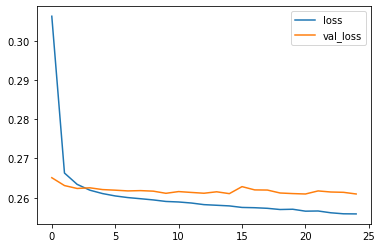

In [97]:
losses[['loss','val_loss']].plot()

In [98]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
predictions = model.predict_classes(X_test)

In [105]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [106]:
print(confusion_matrix(y_test,predictions))

[[ 6824  8834]
 [   83 63303]]
